In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
if 'snakemake' in locals():
    print('Snakemake')
    print(f'{snakemake.input}')
    df_fam = pd.read_csv(snakemake.input.pop_file, delim_whitespace=True, header=None)
    df_bim = pd.read_csv(snakemake.input.chrom_file, delim_whitespace=True, header=None)
    df_kin = pd.read_csv(snakemake.input.kin_file, delim_whitespace=True)
    df_sexcheck = pd.read_csv(snakemake.input.sexcheck_file, delim_whitespace=True)
    df_hwe = pd.read_csv(snakemake.input.hwe_file, delim_whitespace=True)
    frq_tbl = pd.read_csv(snakemake.input.frq_file, delim_whitespace=True)
    het_tbl = pd.read_csv(snakemake.input.het_file, delim_whitespace=True)
    imiss_tbl = pd.read_csv(snakemake.input.imiss_file, delim_whitespace=True)
    lmiss_tbl = pd.read_csv(snakemake.input.lmiss_file, delim_whitespace=True)
    kin0_tbl = pd.read_csv(snakemake.input.kin0_file, delim_whitespace=True)
    
    Error_one = f'Error == {snakemake.params.Error_one}'
    Error_two = f'Error == {snakemake.params.Error_two}'
    Kinship = f'Kinship >= {snakemake.params.Kinship}'
    SNPSEX = f'SNPSEX == {snakemake.params.SNPSEX}'
    P = f'P <= {snakemake.params.P}'
    f_bound = snakemake.params.f_bound
else:
    print('local')
    path = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/'
    s_studyid = 'GECOPD'
    
    frq_file = path+s_studyid+'_annotated_plink_merged.frq'
    het_file = path+s_studyid+'_annotated_plink_merged.het'
    imiss_file = path+s_studyid+'_annotated_plink_merged.imiss'
    lmiss_file = path+s_studyid+'_annotated_plink_merged.lmiss'
    #kin0_file = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_king.kin0'
    
    df_fam = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/GECOPD_annotated_plink_merged.fam", delim_whitespace=True, header=None)
    df_bim = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/GECOPD_annotated_plink_merged.bim.original", delim_whitespace=True, header=None)
    df_kin = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.kin", delim_whitespace=True)
    df_sexcheck = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.sexcheck", delim_whitespace=True)
    df_hwe = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.hwe", delim_whitespace=True)
    frq_tbl = pd.read_csv(frq_file, delim_whitespace=True)
    het_tbl = pd.read_csv(het_file, delim_whitespace=True)
    imiss_tbl = pd.read_csv(imiss_file, delim_whitespace=True)
    lmiss_tbl = pd.read_csv(lmiss_file, delim_whitespace=True)
    #kin0_tbl = pd.read_csv(kin0_file, delim_whitespace=True)
    
    
    Error_one = "Error == 1"
    Error_two = "Error == 0.5"
    Kinship = "Kinship >= 0.354"
    SNPSEX = "SNPSEX == 0"
    P = "P <= 0.000001"
    f_bound = 0.2
    imiss_range = [10,20]
    lmiss_range = [1,5]

local


### GECOPD_annotated_plink_merged.fam
#### Show population details

In [ ]:
print("Population...")
print("# of Rows: " + str(df_fam.shape[0]))
print("# of Columns: " + str(df_fam.shape[1]))

In [5]:
# Show null/missing values per column
df_fam.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [6]:
# Ensure that column 1 has no repeated values
assert(df_fam[1].value_counts().sum() == df_fam.shape[0])

### GECOPD_annotated_plink_merged.bim
#### Show counts/total for column 0

In [7]:
print("# of rows in column 0: " + str(df_bim[0].count()))

# of rows in column 0: 55104308


In [8]:
# write chromosome counts to a file
counts = df_bim[0].value_counts()

f = open("tmp/reaka_output.txt", "a")
f.write("Chromosome Counts in GECOPD_annotated_plink_merged.fam\n")
for idx in counts.index:
    f.write(f'{idx}: {counts[idx]}\n')

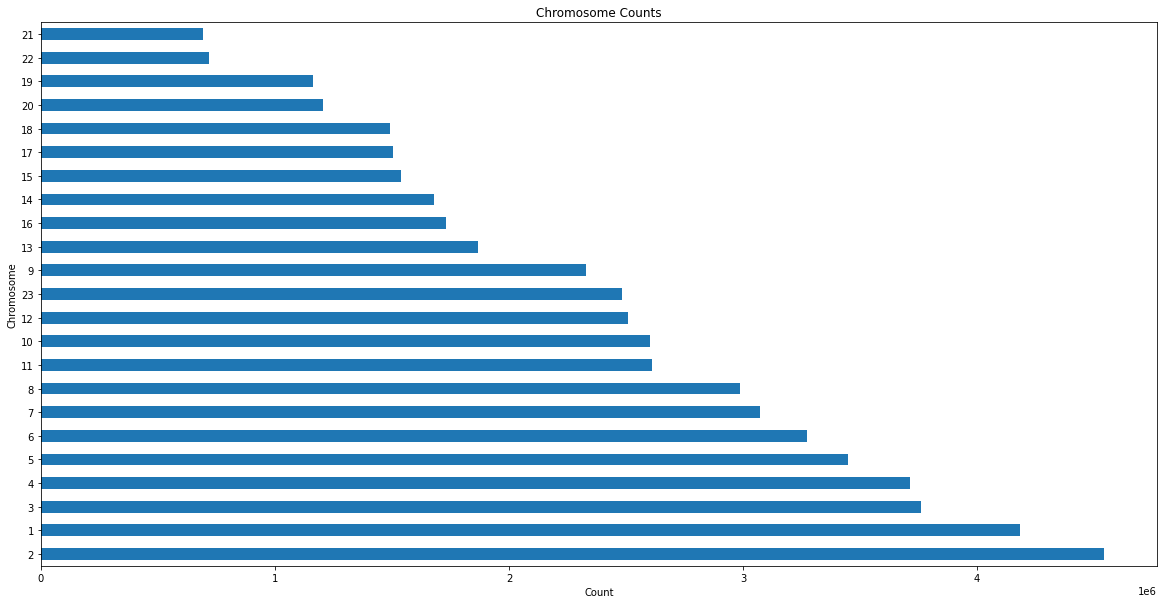

In [9]:
f_plot = plt.figure()
f_plot.set_figwidth(20)
f_plot.set_figheight(10)

df_bim[0].value_counts().plot(kind= "barh");
plt.title("Chromosome Counts");
plt.ylabel("Chromosome");
plt.xlabel("Count");

In [10]:
''' Shows the number of rows and the number of lost rows given certain query contrainsts on a DataFrame

Input:
    - df: DataFrame with data of interest
    - constraints: List of querry strings 
    
Output:
    - result_df: DataFrame showing row count and rows lost
'''
def generate_lost_df(df, constraints):
    diff_data = {}
    
    for curr in constraints:
        df_contrained = df.query(curr)
        diff_data[curr] = [df_contrained.shape[0], df.shape[0] - df_contrained.shape[0]]
        
    result_df = pd.DataFrame(data=diff_data, index=["Row Count", "Rows Lost"])
        
    return result_df

### GECOPD_annotated_plink_merged.kin

#### Show Error=1, Error=0.5, Kinship >= 0.354

In [11]:
kin_lost_df = generate_lost_df(df_kin, [Error_one, Error_two, Kinship])
kin_lost_df

,Error == 1,Error == 0.5,Kinship >= 0.354
Row Count,29346,1816277,164
Rows Lost,56018232,54231301,56047414


In [12]:
# write number of lost rows to file
f.write("Rows lost when...\n")
f.write(f'{Error_one}: {kin_lost_df[Error_one]["Rows Lost"]}\n')
f.write(f'{Error_two}: {kin_lost_df[Error_two]["Rows Lost"]}\n')
f.write(f'{Kinship}: {kin_lost_df[Kinship]["Rows Lost"]}\n')

### GECOPD_annotated_plink_merged.sexcheck

#### Histogram of F

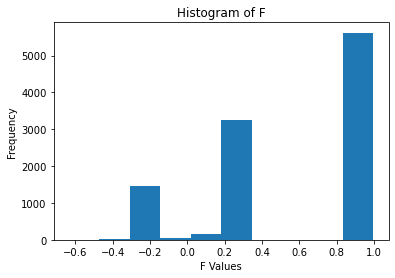

In [13]:
plt.hist(df_sexcheck["F"]);
plt.title("Histogram of F");
plt.ylabel("Frequency");
plt.xlabel("F Values");

#### Table of SNPSEX == 0

In [14]:
df_sexcheck_lost = generate_lost_df(df_sexcheck, [SNPSEX])
df_sexcheck_lost

,SNPSEX == 0
Row Count,3026
Rows Lost,7562


In [15]:
# write number of lost rows to file
f.write("Rows lost when...\n")
f.write(f'{SNPSEX}: {df_sexcheck_lost[SNPSEX]["Rows Lost"]}\n')

#### Count of each SNPSEX value

In [16]:
df_sexcheck["SNPSEX"].value_counts()

1    5623
0    3026
2    1939
Name: SNPSEX, dtype: int64

### GECOPD_annotated_plink_merged.hwe
#### P <= configured threshold (default=1x10^-6)

In [17]:
df_hwe_lost = generate_lost_df(df_hwe, [P])
df_hwe_lost

,P <= 0.000001
Row Count,4668798
Rows Lost,50435510


In [18]:
# write number of lost rows to file
f.write("Rows lost when...\n")
f.write(f'{P}: {df_hwe_lost[P]["Rows Lost"]}\n')

    
f.close()

In [9]:
m = open("tmp/remra_output.txt", "a")
m.write('martina output')
m.close()

### F coefficent estimates

Samples out of range: 24


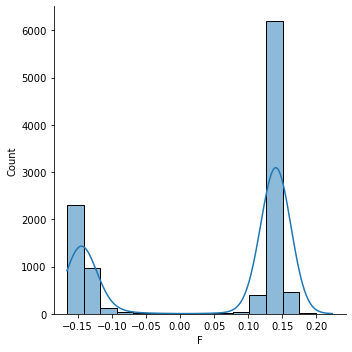

In [11]:
def tbl_filtered_fcoe(f):
    print('Samples out of range: '+ str(het_tbl.size - het_tbl.query('F >= -0.2').query('F <= 0.2').size))
    return het_tbl.query('F >= -'+str(f)).query('F <= '+str(f))

tbl_filtered_fcoe(f_bound)

#plots:
sns.displot(het_tbl['F'], kde=True)

### Minor Allele Frequency 

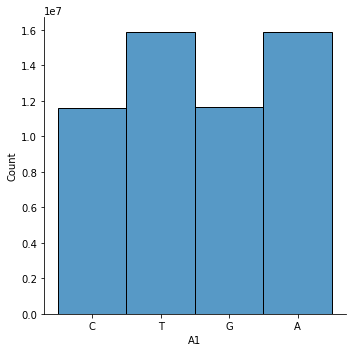

In [12]:
#plots 
sns.displot(frq_tbl['A1'])

### Sample based missing data

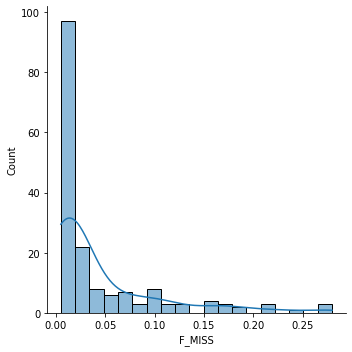

In [13]:
# how many individuals removed from data based on threshold 
def filter_missingdata(threshold, tbl):
    total = tbl.size
    filtered = tbl.query('F_MISS >'+str(threshold)).size
    ppl_removed = 'Number of samples: '+str(filtered)
    return filtered

def missingness_range(rnge, tbl):
    bounds = []
    bounds.append(filter_missingdata((0), tbl))
    percents = ['total']
    for per in range(rnge[0],rnge[1]+1):
        percents.append(per)
        size = filter_missingdata((per/100), tbl)
        bounds.append(size)

    d = {'F_MISS % >': percents, 'Num of samples': bounds}
    return (pd.DataFrame(data=d))

missingness_range(imiss_range, imiss_tbl)

#plots:
sns.displot(imiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)

### Variant based missing data

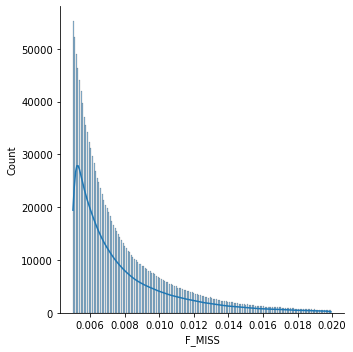

In [14]:
missingness_range(lmiss_range, lmiss_tbl)

#plots 
sns.displot(lmiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)

### Kinship data

In [15]:
#def filter_kinship(kin):
#    return kin0_tbl[kin0_tbl['Kinship'] >= kin]

#filter_kinship(Kinship)

#plots:
#plt.scatter(kin0_tbl['Kinship'], kin0_tbl['IBS0'], alpha=0.3)